In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = pd.read_csv('/content/zomato_dataset.csv')

In [4]:
data

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,NaN,0,525.0
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,NaN,0,525.0
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,NaN,0,525.0
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,NaN,0,525.0


In [5]:
data = data[(data['City'] == ' Mumbai') | (data['City'] == ' Pune') | (data['City'] == ' Goa') | (data['City'] == ' New Delhi')]
data

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
15613,Oye Kiddan,NaN,3.4,0,0,Desserts,Matunga East,Mumbai,Aloo Paratha,MUST TRY,398,89.0
15614,Oye Kiddan,NaN,3.4,0,0,Desserts,Matunga East,Mumbai,Cheese Chilli Paratha,MUST TRY,193,149.0
15615,Oye Kiddan,NaN,3.4,0,0,Desserts,Matunga East,Mumbai,Amritsari Kulche Chole,BESTSELLER,72,225.0
15616,Oye Kiddan,NaN,3.4,0,0,Desserts,Matunga East,Mumbai,Chicken Cheese Paratha,BESTSELLER,124,169.0
15617,Oye Kiddan,NaN,3.4,0,0,Desserts,Matunga East,Mumbai,Punjabi Lassi,Not eligible for coupons,281,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...
109785,If Pizza,4.2,4.2,122,0,Fast Food,Pandav Nagar,New Delhi,Corn Pizza + Choco Lava Cake,NaN,0,188.0
109786,If Pizza,4.2,4.2,122,0,Fast Food,Pandav Nagar,New Delhi,Margherita Pizza + Choco Lava Cake,NaN,0,188.0
109787,If Pizza,4.2,4.2,122,0,Fast Food,Pandav Nagar,New Delhi,Onion Cheese + Choco Lava Cake,NaN,0,188.0
109788,If Pizza,4.2,4.2,122,0,Fast Food,Pandav Nagar,New Delhi,Pink Sauce Pasta,BESTSELLER,10,188.0


In [6]:
dataset = data[['Restaurant Name','Dining Rating', 'Delivery Rating', 'Dining Votes', 'Delivery Votes', 'Best Seller', 'Votes', 'Prices']]
dataset

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Best Seller,Votes,Prices
15613,Oye Kiddan,NaN,3.4,0,0,MUST TRY,398,89.0
15614,Oye Kiddan,NaN,3.4,0,0,MUST TRY,193,149.0
15615,Oye Kiddan,NaN,3.4,0,0,BESTSELLER,72,225.0
15616,Oye Kiddan,NaN,3.4,0,0,BESTSELLER,124,169.0
15617,Oye Kiddan,NaN,3.4,0,0,Not eligible for coupons,281,65.0
...,...,...,...,...,...,...,...,...
109785,If Pizza,4.2,4.2,122,0,NaN,0,188.0
109786,If Pizza,4.2,4.2,122,0,NaN,0,188.0
109787,If Pizza,4.2,4.2,122,0,NaN,0,188.0
109788,If Pizza,4.2,4.2,122,0,BESTSELLER,10,188.0


In [7]:
dataset = dataset.dropna()
dataset

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Best Seller,Votes,Prices
16550,Smokin' Joe's,3.1,3.6,131,0,SPICY,48,245.0
16551,Smokin' Joe's,3.1,3.6,131,0,SPICY,25,370.0
16553,Smokin' Joe's,3.1,3.6,131,0,SPICY,6,420.0
16554,Smokin' Joe's,3.1,3.6,131,0,SPICY,5,370.0
16555,Smokin' Joe's,3.1,3.6,131,0,BESTSELLER,0,340.0
...,...,...,...,...,...,...,...,...
109746,If Pizza,4.2,4.2,122,0,BESTSELLER,49,150.0
109750,If Pizza,4.2,4.2,122,0,BESTSELLER,34,88.0
109763,If Pizza,4.2,4.2,122,0,BESTSELLER,5,150.0
109776,If Pizza,4.2,4.2,122,0,BESTSELLER,53,88.0


In [8]:

missing_values = dataset.isnull().sum()
print("Missing values:")
print(missing_values)


for column in dataset.columns:
    unique_values = dataset[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)


Missing values:
Restaurant Name    0
Dining Rating      0
Delivery Rating    0
Dining Votes       0
Delivery Votes     0
Best Seller        0
Votes              0
Prices             0
dtype: int64
Unique values in column 'Restaurant Name':
["Smokin' Joe's" '99 Pancakes' 'Shivsu Pizza' 'Chaitanya' 'SP Burger'
 'The Momo Factory' 'Dadar Social' 'Jimis Burger' 'Shobhaa Only Veg'
 'Chote Nawab' 'Blue Tokai Coffee Roasters' 'Flavours Of China'
 'Food Adda' 'Delhi Zaika' 'Raj Restaurant' 'Ovenfresh'
 'Aromas Cafe & Bistro' 'Dimsum Momo Express'
 "Juno's Pizza - Baking Fresh Since 1974" 'Tossin Pizza'
 'Gokul Refreshment' 'Boojee Cafe' 'Annamaya' 'Apoorva Delicacies'
 'Potoba' 'Sahara Family Restaurant' 'The Fatty Bao' 'Fuel Up'
 'Burger - Since 1989' 'Garden Vada Pav Centre' 'Supreme Sandwich Corner'
 'MH 12 Pav Bhaji' 'Pokket Cafe' 'Pizza Bites' 'The Pizza Box'
 'RK Pure Veg' 'Roll Point' 'Marrakesh' 'Chill Out'
 'Fried Chicken Destination' 'Hyderabadi Laziz' "Mother's Kitchen"
 'Blue Nile'

In [9]:
dataset.loc[:, 'Restaurant_Success'] = None

<ipython-input-9-3cfa08d6c2b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, 'Restaurant_Success'] = None


In [10]:
# Created 'Restaurant Success' feature based on average rating
dataset['Restaurant_Success'] = ((dataset['Dining Rating'] + dataset['Delivery Rating']) / 2 >= 3.5).astype(int)


<ipython-input-10-a607ee6e14a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Restaurant_Success'] = ((dataset['Dining Rating'] + dataset['Delivery Rating']) / 2 >= 3.5).astype(int)


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 16550 to 109788
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Restaurant Name     3356 non-null   object 
 1   Dining Rating       3356 non-null   float64
 2   Delivery Rating     3356 non-null   float64
 3   Dining Votes        3356 non-null   int64  
 4   Delivery Votes      3356 non-null   int64  
 5   Best Seller         3356 non-null   object 
 6   Votes               3356 non-null   int64  
 7   Prices              3356 non-null   float64
 8   Restaurant_Success  3356 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 262.2+ KB


In [11]:
label_encoder = LabelEncoder()

dataset['Best Seller'] = label_encoder.fit_transform(dataset['Best Seller'])

dataset

<ipython-input-11-4cf6cc4e6d37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Best Seller'] = label_encoder.fit_transform(dataset['Best Seller'])


,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Best Seller,Votes,Prices,Restaurant_Success
16550,Smokin' Joe's,3.1,3.6,131,0,11,48,245.0,0
16551,Smokin' Joe's,3.1,3.6,131,0,11,25,370.0,0
16553,Smokin' Joe's,3.1,3.6,131,0,11,6,420.0,0
16554,Smokin' Joe's,3.1,3.6,131,0,11,5,370.0,0
16555,Smokin' Joe's,3.1,3.6,131,0,0,0,340.0,0
...,...,...,...,...,...,...,...,...,...
109746,If Pizza,4.2,4.2,122,0,0,49,150.0,1
109750,If Pizza,4.2,4.2,122,0,0,34,88.0,1
109763,If Pizza,4.2,4.2,122,0,0,5,150.0,1
109776,If Pizza,4.2,4.2,122,0,0,53,88.0,1


In [12]:
features = ['Dining Rating', 'Delivery Rating', 'Dining Votes', 'Delivery Votes',
            'Best Seller', 'Votes', 'Prices']


X_train, X_test, y_train, y_test = train_test_split(dataset[features], dataset['Restaurant_Success'], test_size=0.2, random_state=42)



#Tree using gini index as a criteria for splitting

In [13]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()

scores = cross_val_score(clf, dataset[features], dataset['Restaurant_Success'], cv=5)  # cv=5 for 5-fold cross-validation

print("Mean Accuracy:", scores.mean())

Mean Accuracy: 0.9687034277198212


In [14]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=None, min_samples_leaf=1)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(random_state=100)

In [15]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 2684 entries, 63232 to 108861
Series name: Restaurant_Success
Non-Null Count  Dtype
--------------  -----
2684 non-null   int64
dtypes: int64(1)
memory usage: 41.9 KB


[Text(0.5, 0.875, 'x[0] <= 3.25\ngini = 0.193\nsamples = 2684\nvalue = [291, 2393]'),
 Text(0.2, 0.625, 'x[1] <= 4.05\ngini = 0.372\nsamples = 361\nvalue = [272, 89]'),
 Text(0.1, 0.375, 'gini = 0.0\nsamples = 243\nvalue = [243, 0]'),
 Text(0.3, 0.375, 'x[2] <= 379.5\ngini = 0.371\nsamples = 118\nvalue = [29, 89]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 89\nvalue = [0, 89]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.8, 0.625, 'x[1] <= 3.55\ngini = 0.016\nsamples = 2323\nvalue = [19, 2304]'),
 Text(0.7, 0.375, 'x[0] <= 3.55\ngini = 0.375\nsamples = 76\nvalue = [19, 57]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 57\nvalue = [0, 57]'),
 Text(0.9, 0.375, 'gini = 0.0\nsamples = 2247\nvalue = [0, 2247]')]

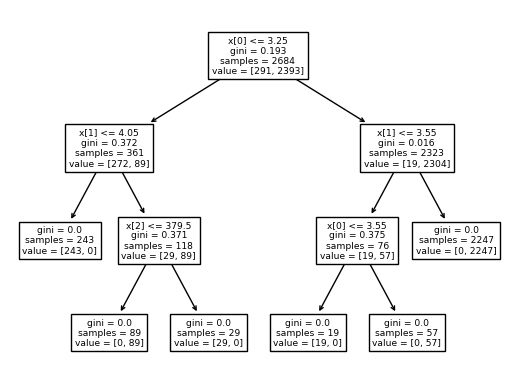

In [15]:
from sklearn import tree
tree.plot_tree(clf_gini)

In [16]:
from sklearn.metrics import accuracy_score


y_pred = clf_gini.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [17]:
from sklearn.metrics import classification_report

y_pred = clf_gini.predict(X_test)

report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00       584

    accuracy                           1.00       672
   macro avg       1.00      1.00      1.00       672
weighted avg       1.00      1.00      1.00       672



#Tree using entropy as a criteria for splitting

In [18]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = None, min_samples_leaf=1)

In [19]:
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

[Text(0.5, 0.875, 'x[0] <= 3.25\nentropy = 0.495\nsamples = 2684\nvalue = [291, 2393]'),
 Text(0.2, 0.625, 'x[1] <= 4.05\nentropy = 0.806\nsamples = 361\nvalue = [272, 89]'),
 Text(0.1, 0.375, 'entropy = 0.0\nsamples = 243\nvalue = [243, 0]'),
 Text(0.3, 0.375, 'x[2] <= 379.5\nentropy = 0.804\nsamples = 118\nvalue = [29, 89]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 89\nvalue = [0, 89]'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.8, 0.625, 'x[1] <= 3.55\nentropy = 0.068\nsamples = 2323\nvalue = [19, 2304]'),
 Text(0.7, 0.375, 'x[0] <= 3.55\nentropy = 0.811\nsamples = 76\nvalue = [19, 57]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 57\nvalue = [0, 57]'),
 Text(0.9, 0.375, 'entropy = 0.0\nsamples = 2247\nvalue = [0, 2247]')]

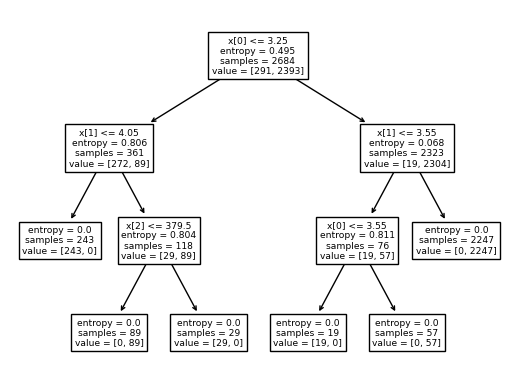

In [20]:
tree.plot_tree(clf_entropy)

In [21]:
from sklearn.metrics import accuracy_score


y_pred = clf_entropy.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [22]:
from sklearn.metrics import classification_report

y_pred = clf_entropy.predict(X_test)

report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00       584

    accuracy                           1.00       672
   macro avg       1.00      1.00      1.00       672
weighted avg       1.00      1.00      1.00       672



Heat Map for the Entire Data Set

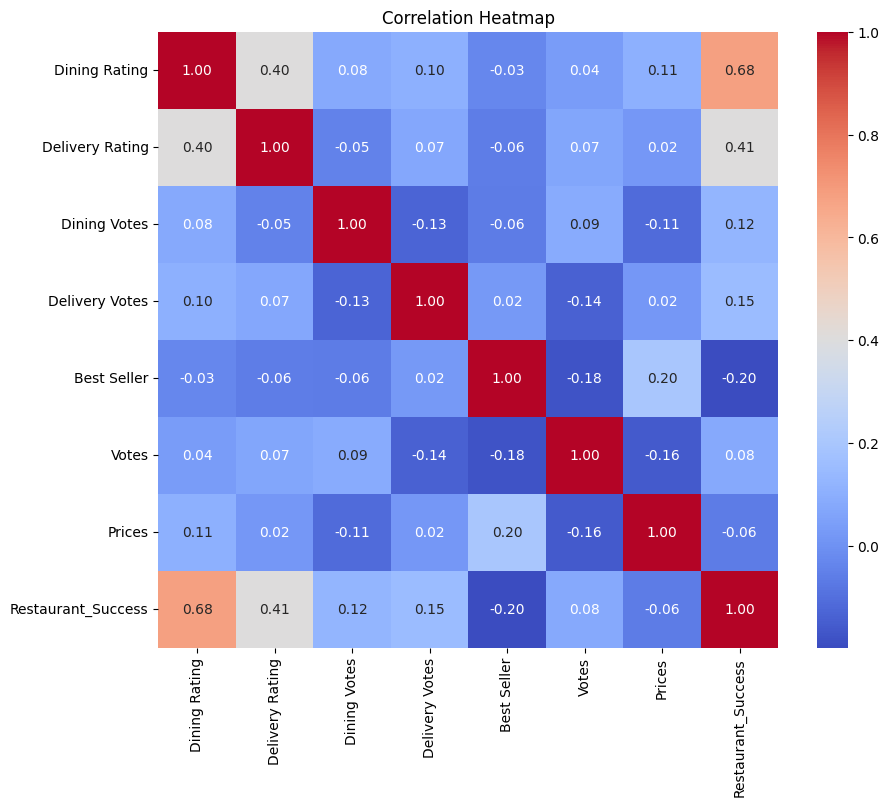

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix  = dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


Confusion Matrix Showing AN,AP,PN,PP

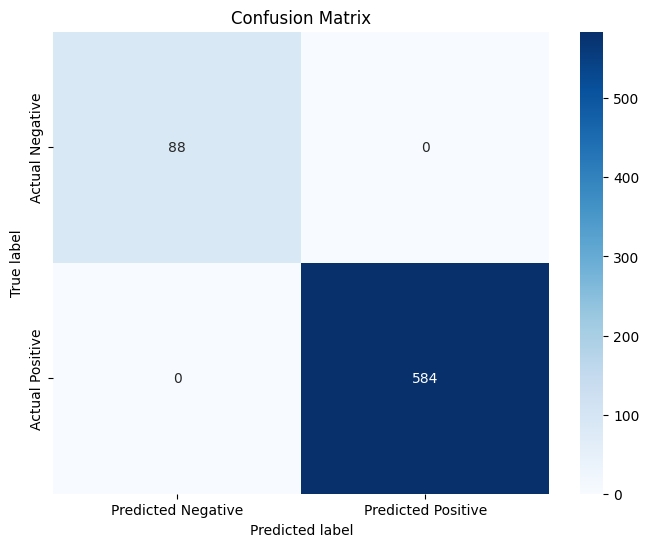

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Learning Curve showing the model's performance as a function of training data size therefor aiding in the assessment of whether the model would benefit from additional training data or if it has already reached its maximum performance.

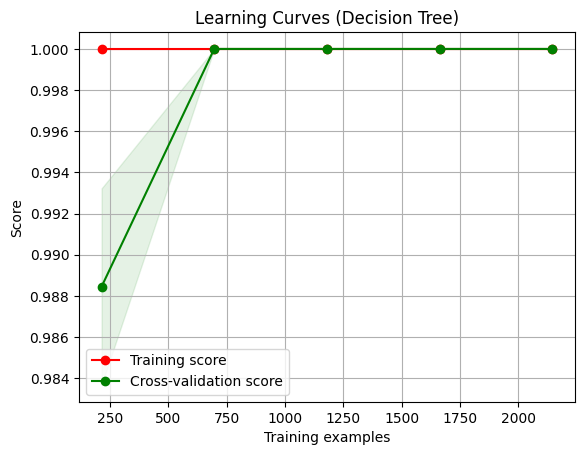

In [30]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,train_sizes=np.linspace(.1, 1.0, 5)):


  plt.figure()
  plt.title(title)
  if ylim is not None:
      plt.ylim(*ylim)
  plt.xlabel("Training examples")
  plt.ylabel("Score")
  train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")

  plt.legend(loc="best")
  return plt

title = "Learning Curves (Decision Tree)"
estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X_train, y_train, cv=5)
plt.show()